# Master EDA Notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

Let's take a look at the data and look for incorrect data types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

'date' is an object rather than datetime. Let's fix that before checking the other objects

In [3]:
df['date'] = pd.to_datetime(df['date'])


Now, we can loop over the other objects to check what we can do with them, and check for NaN values.

In [4]:
frame = pd.DataFrame(df.dtypes)
categoricals = list(frame.loc[frame.iloc[:,0]=='object'].iloc[:,0].keys())
for col in categoricals:
    print(col,"\n",df[col].value_counts().sort_values(ascending=False),"\n")

waterfront 
 NO     19075
YES      146
Name: waterfront, dtype: int64 

view 
 NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64 

condition 
 Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64 

grade 
 7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64 

sqft_basement 
 0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2120.0        1
295.0         1
207.0         1
915.0         1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64 



In [5]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

'waterfront' needs to be converted to a binary value and we'll also do mode imputing to fill the NaNs.

In [6]:
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].isnull().any()
df['waterfront'] = df['waterfront'].replace(['NO','YES'],[0, 1])

'view' 'grade' and 'condition' can be converted to ordinal integers.

In [7]:
df.view.replace(['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'],list(range(0,5)), inplace = True)
df.view.fillna(0, inplace = True)
df['view'] = df.view.astype('int')

In [8]:
ser = []
for x in df.grade:
    ser.append(x.split(' ')[0])
df['grade'] = ser
df['grade'] = df['grade'].astype('int') - 3

In [9]:
condition_list = ['Poor','Fair','Average','Good','Very Good']
df.condition.replace(condition_list,list(range(0,5)),inplace=True)

'sqft_basement' should be an integer, but there are '?' strings interfering. Let's calculate those missing values by testing if there is square footage unaccounted for in the home (non-living space) and converting everything to integers.

In [10]:
for z,i  in enumerate(df['sqft_basement']):
    if i == '?':
        #print(z)
        df.sqft_basement.iat[z] = df.loc[z,'sqft_living'] - df.loc[z, 'sqft_above']
df['perc_basement'] = df.sqft_basement.astype('float') / df['sqft_living']
df.drop(columns=['sqft_basement','sqft_above'],inplace=True)

In [11]:
min_date = df.date.min()
df['diff_date'] = df.date - min_date
df['diff_date'] = df.diff_date.astype('timedelta64[D]').astype('int')

Now let's look at our numerical data for outliers.

In [12]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      2.409825   
std    4.141264e+04      0.539683      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      0.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      2.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      2.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      3.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      4.000000   

              grade      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean       4.657915   1970.999676     83.636778  98077.951845     47.560093   
std        1.173200     29.375234    399.946414     53.513072      0.138552   
min        0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%        4.000000   1951.000000      0.000000  98033.000000     47.471100   
50%        4.000000   1975.000000      0.000000  98065.000000     47.571800   
75%        5.000000   1997.000000      0.000000  98118.000000     47.678000   
max       10.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  perc_basement     diff_date  
count  21597.000000   21597.000000   21597.000000   21597.000000  21597.000000  
mean    -122.213982    1986.620318   12758.283512       0.124594    180.180997  
std        0.140724     685.230472   27274.441950       0.170999    113.059987  
min     -122.519000     399.000000     651.000000       0.000000      0.000000  
25%     -122.328000    1490.000000    5100.000000       0.000000     81.000000  
50%     -122.231000    1840.000000    7620.000000       0.000000    167.000000  
75%     -122.125000    2360.000000   10083.000000       0.274390    291.000000  
max     -121.315000    6210.000000  871200.000000       0.666667    390.000000

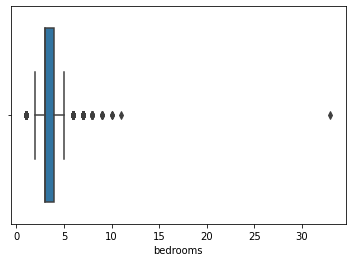

In [13]:
sns.boxplot(data = df, x = 'bedrooms');

'bedrooms' has an outlier of 33. Upon closer inspection, it appears to be a typo. We will change it to 3.

In [14]:
df.iat[15856,3] = 3

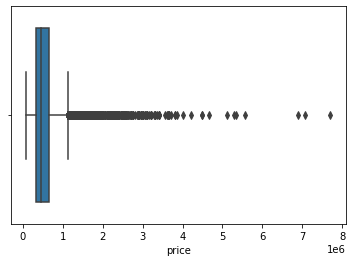

In [15]:
sns.boxplot(data = df, x = 'price');

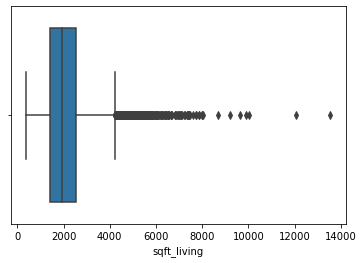

In [16]:
sns.boxplot(data = df, x = 'sqft_living');

There are also statistical outliers above $5 million and above3e 13000 sqft. I don't think our model needs to generalize to these types of homes, so we will drop them.

In [17]:
df = df.loc[df['price'] < 5000000]
df= df.loc[df['sqft_living'] < 13000]


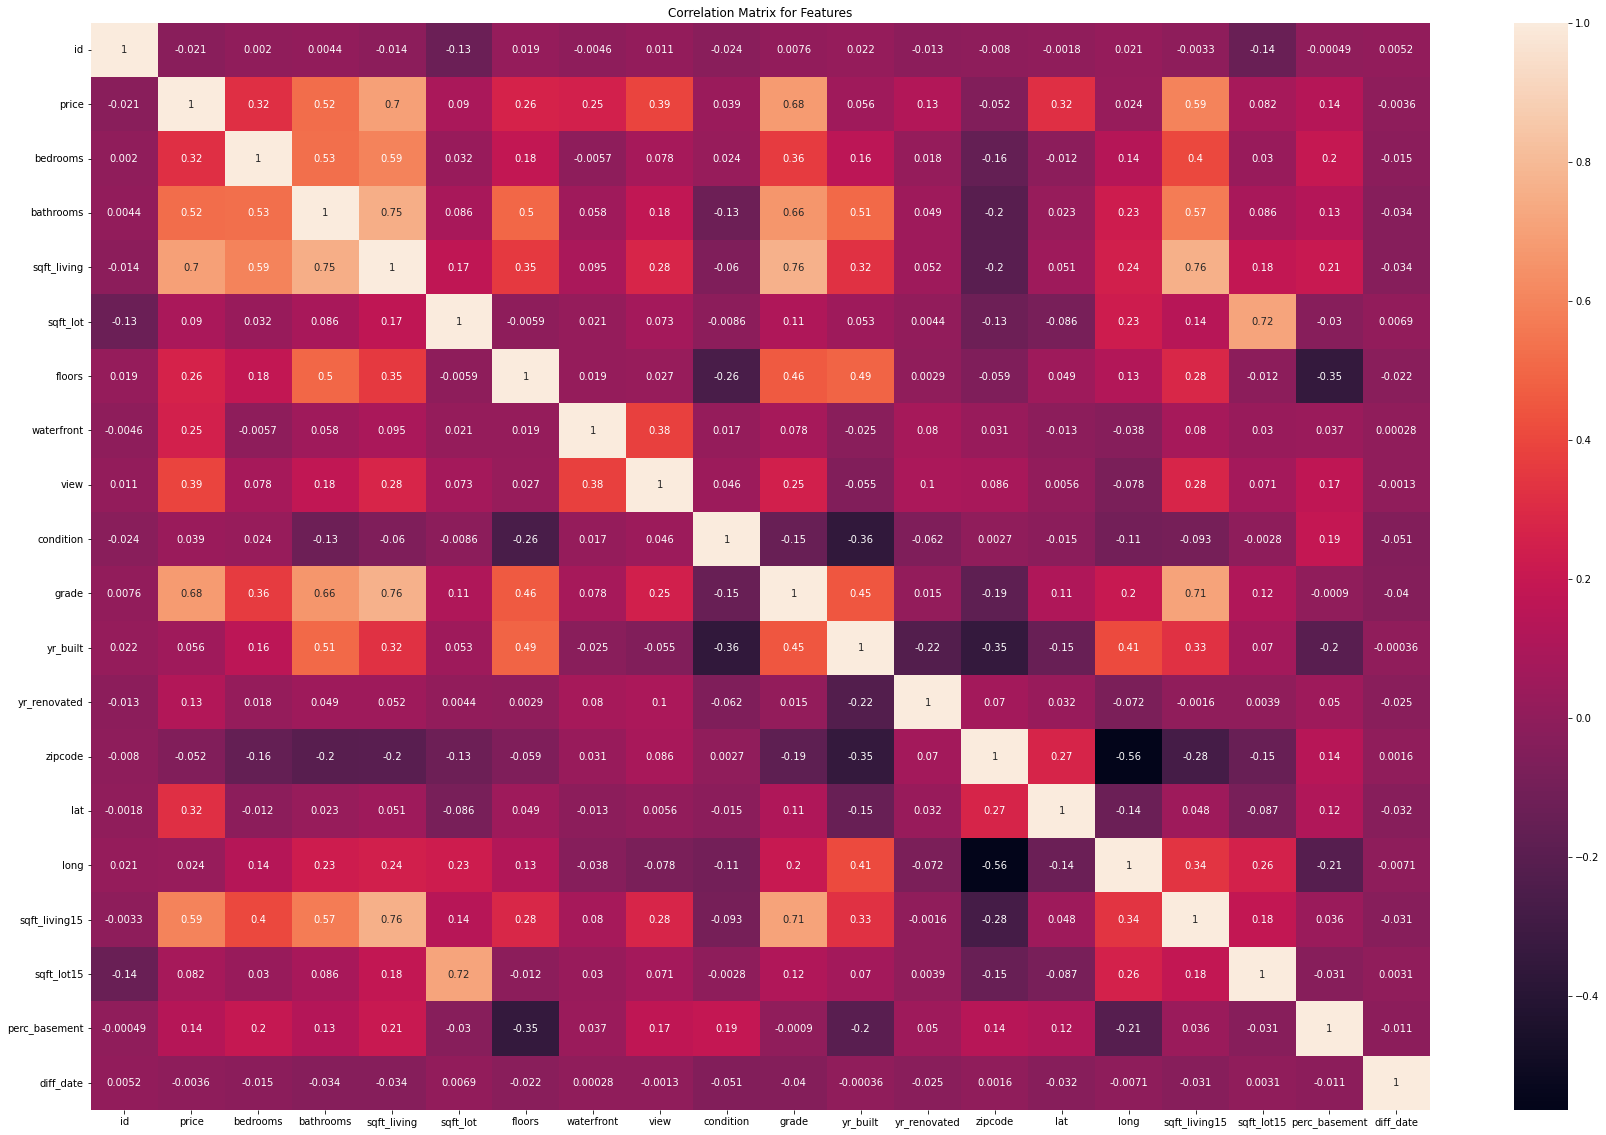

In [18]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.show()

Here we have some pretty obvious covariance, namely 'sqft_living15' and 'sqft_lot15.' We can amelioriate this by dividing them by 'sqft_living' and 'sqft_lot,' respectively to yield percentages. They represent the size of the average house/lot compared to the home.

In [19]:
df['sqft_living15'] = df.sqft_living15/df.sqft_living

In [20]:
df['sqft_lot15'] = df.sqft_lot15/df.sqft_lot

'floors' has "half-floors" which may complicate things. Since half-floors are not stacked, we will take them out of the numerical value and create a boolean variable instead.

In [21]:
df['storeys'] = df['floors'].astype('int')

In [22]:
df = pd.get_dummies(df, columns=['floors'])
df['half_floor'] = df['floors_1.5'] + df['floors_2.5'] + df['floors_3.5']

We'll also create a feature for whether or not there are stairs inside the home. Then we'll delete the dummy features we made but don't need.

In [23]:
df['has_stairs_inside'] = df['floors_1.0'].replace({0:1,1:0})

In [24]:

df.drop(columns=['floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5'], inplace=True)

Here we can create a feature representing when the last "work" was recorded on the property. If there is no renovation date, we'll take the date it was built.

In [25]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['last_work_done'] = df.yr_built
for i,v in enumerate(df.yr_renovated):
    app = None
    if v != 0:
        df['last_work_done'][i] = v
    ser.append(app)

C:\Users\kapta\AppData\Local\Temp\ipykernel_17252\2106715413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_work_done'][i] = v


Finally, we will create a feature that expresses the distance a property is from downtown seattle.

In [26]:
from geopy.distance import geodesic as GD

In [27]:
lat_seattle_downtown = 47.6050
long_seattle_downtown = -122.334
df['lat_long_tup'] = tuple(zip(df.lat,df.long))
df['dist_to_seattle'] = df.lat_long_tup.map(lambda x: GD(x,(lat_seattle_downtown,long_seattle_downtown)).km)
df.drop(columns = ['lat_long_tup'],inplace=True)
df

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21592   263000018 2014-05-21  360000.0         3       2.50         1530   
21593  6600060120 2015-02-23  400000.0         4       2.50         2310   
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  waterfront  view  condition  ...     long  sqft_living15  \
0          5650           0     0          2  ... -122.257       1.135593   
1          7242           0     0          2  ... -122.319       0.657588   
2         10000           0     0          2  ... -122.233       3.532468   
3          5000           0     0          4  ... -122.393       0.693878   
4          8080           0     0          2  ... -122.045       1.071429   
...         ...         ...   ...        ...  ...      ...            ...   
21592      1131           0     0          2  ... -122.346       1.000000   
21593      5813           0     0          2  ... -122.362       0.792208   
21594      1350           0     0          2  ... -122.299       1.000000   
21595      2388           0     0          2  ... -122.069       0.881250   
21596      1076           0     0          2  ... -122.299       1.000000   

       sqft_lot15  perc_basement  diff_date  storeys  half_floor  \
0        1.000000       0.000000        164        1           0   
1        1.054819       0.155642        221        2           0   
2        0.806200       0.000000        299        1           0   
3        1.000000       0.464286        221        1           0   
4        0.928589       0.000000        292        1           0   
...           ...            ...        ...      ...         ...   
21592    1.334218       0.000000         19        3           0   
21593    1.238603       0.000000        297        2           0   
21594    1.486667       0.000000         52        2           0   
21595    0.538945       0.000000        259        2           0   
21596    1.261152       0.000000        166        2           0   

       has_stairs_inside  last_work_done  dist_to_seattle  
0                      0            1955        11.930775  
1                      1            1991        12.946433  
2                      0            1933        16.609359  
3                      0            1965        10.361036  
4                      0            1987        21.767956  
...                  ...             ...              ...  
21592                  1            2009        10.523295  
21593                  1            2014        10.694116  
21594                  1            2009         2.883837  
21595                  1            2004        21.424889  
21596                  1            2008         2.897635  

[21589 rows x 25 columns]

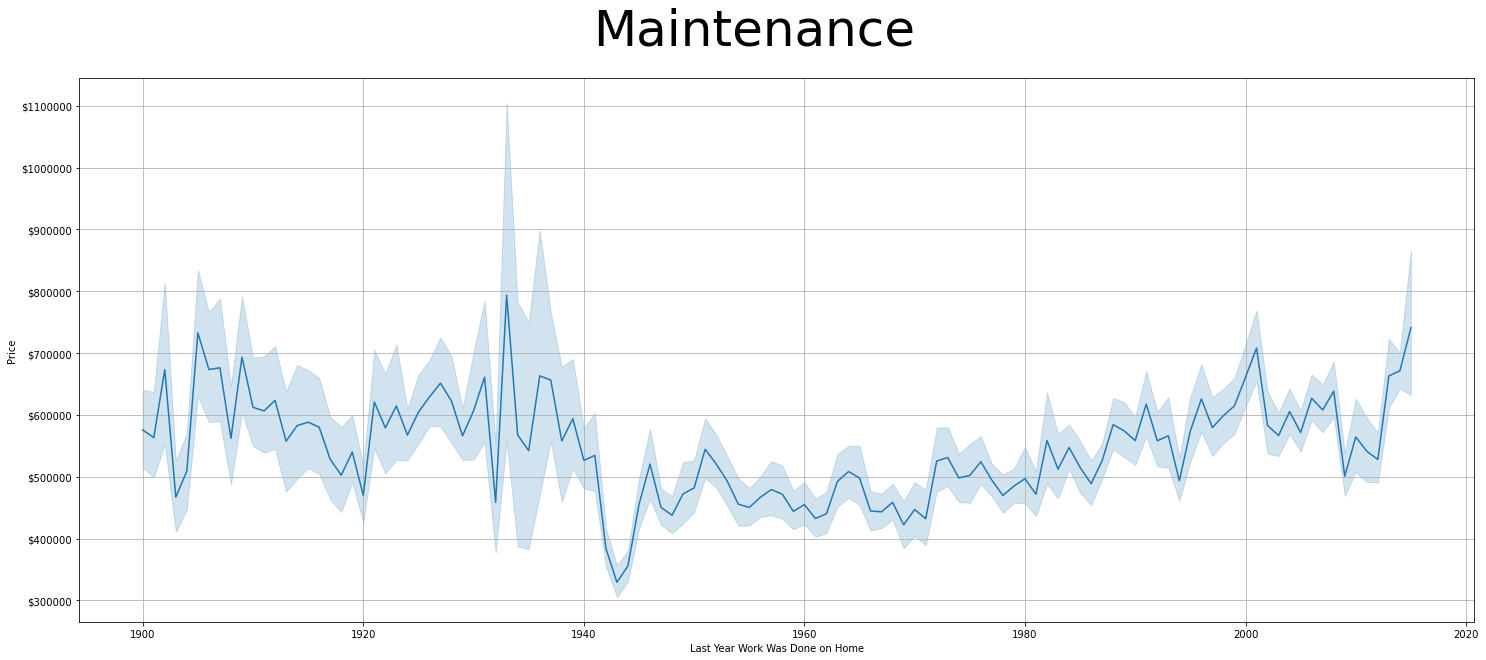

In [28]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Maintenance', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.lineplot(data = df, x = 'last_work_done', y = 'price').set(xlabel='Last Year Work Was Done on Home', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()


Here, we can see there is a bump in price before 1941. We could try encoding this relationship in a new boolean variable 'pre_war'

In [29]:
df['pre_war'] = df['yr_built'].map(lambda x: 1 if (x < 1941) else 0, na_action='ignore')
df.pre_war

0        0
1        0
2        1
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: pre_war, Length: 21589, dtype: int64

Here, we drop the columns we don't want want to look at in our model or visualizations.

In [30]:
df = df.drop(columns = ['id', 'date', 'yr_renovated','has_stairs_inside', 'lat', 'long', 'diff_date','half_floor','yr_built'])

Now, we can run an array of visualizations to look for anything abnormal.

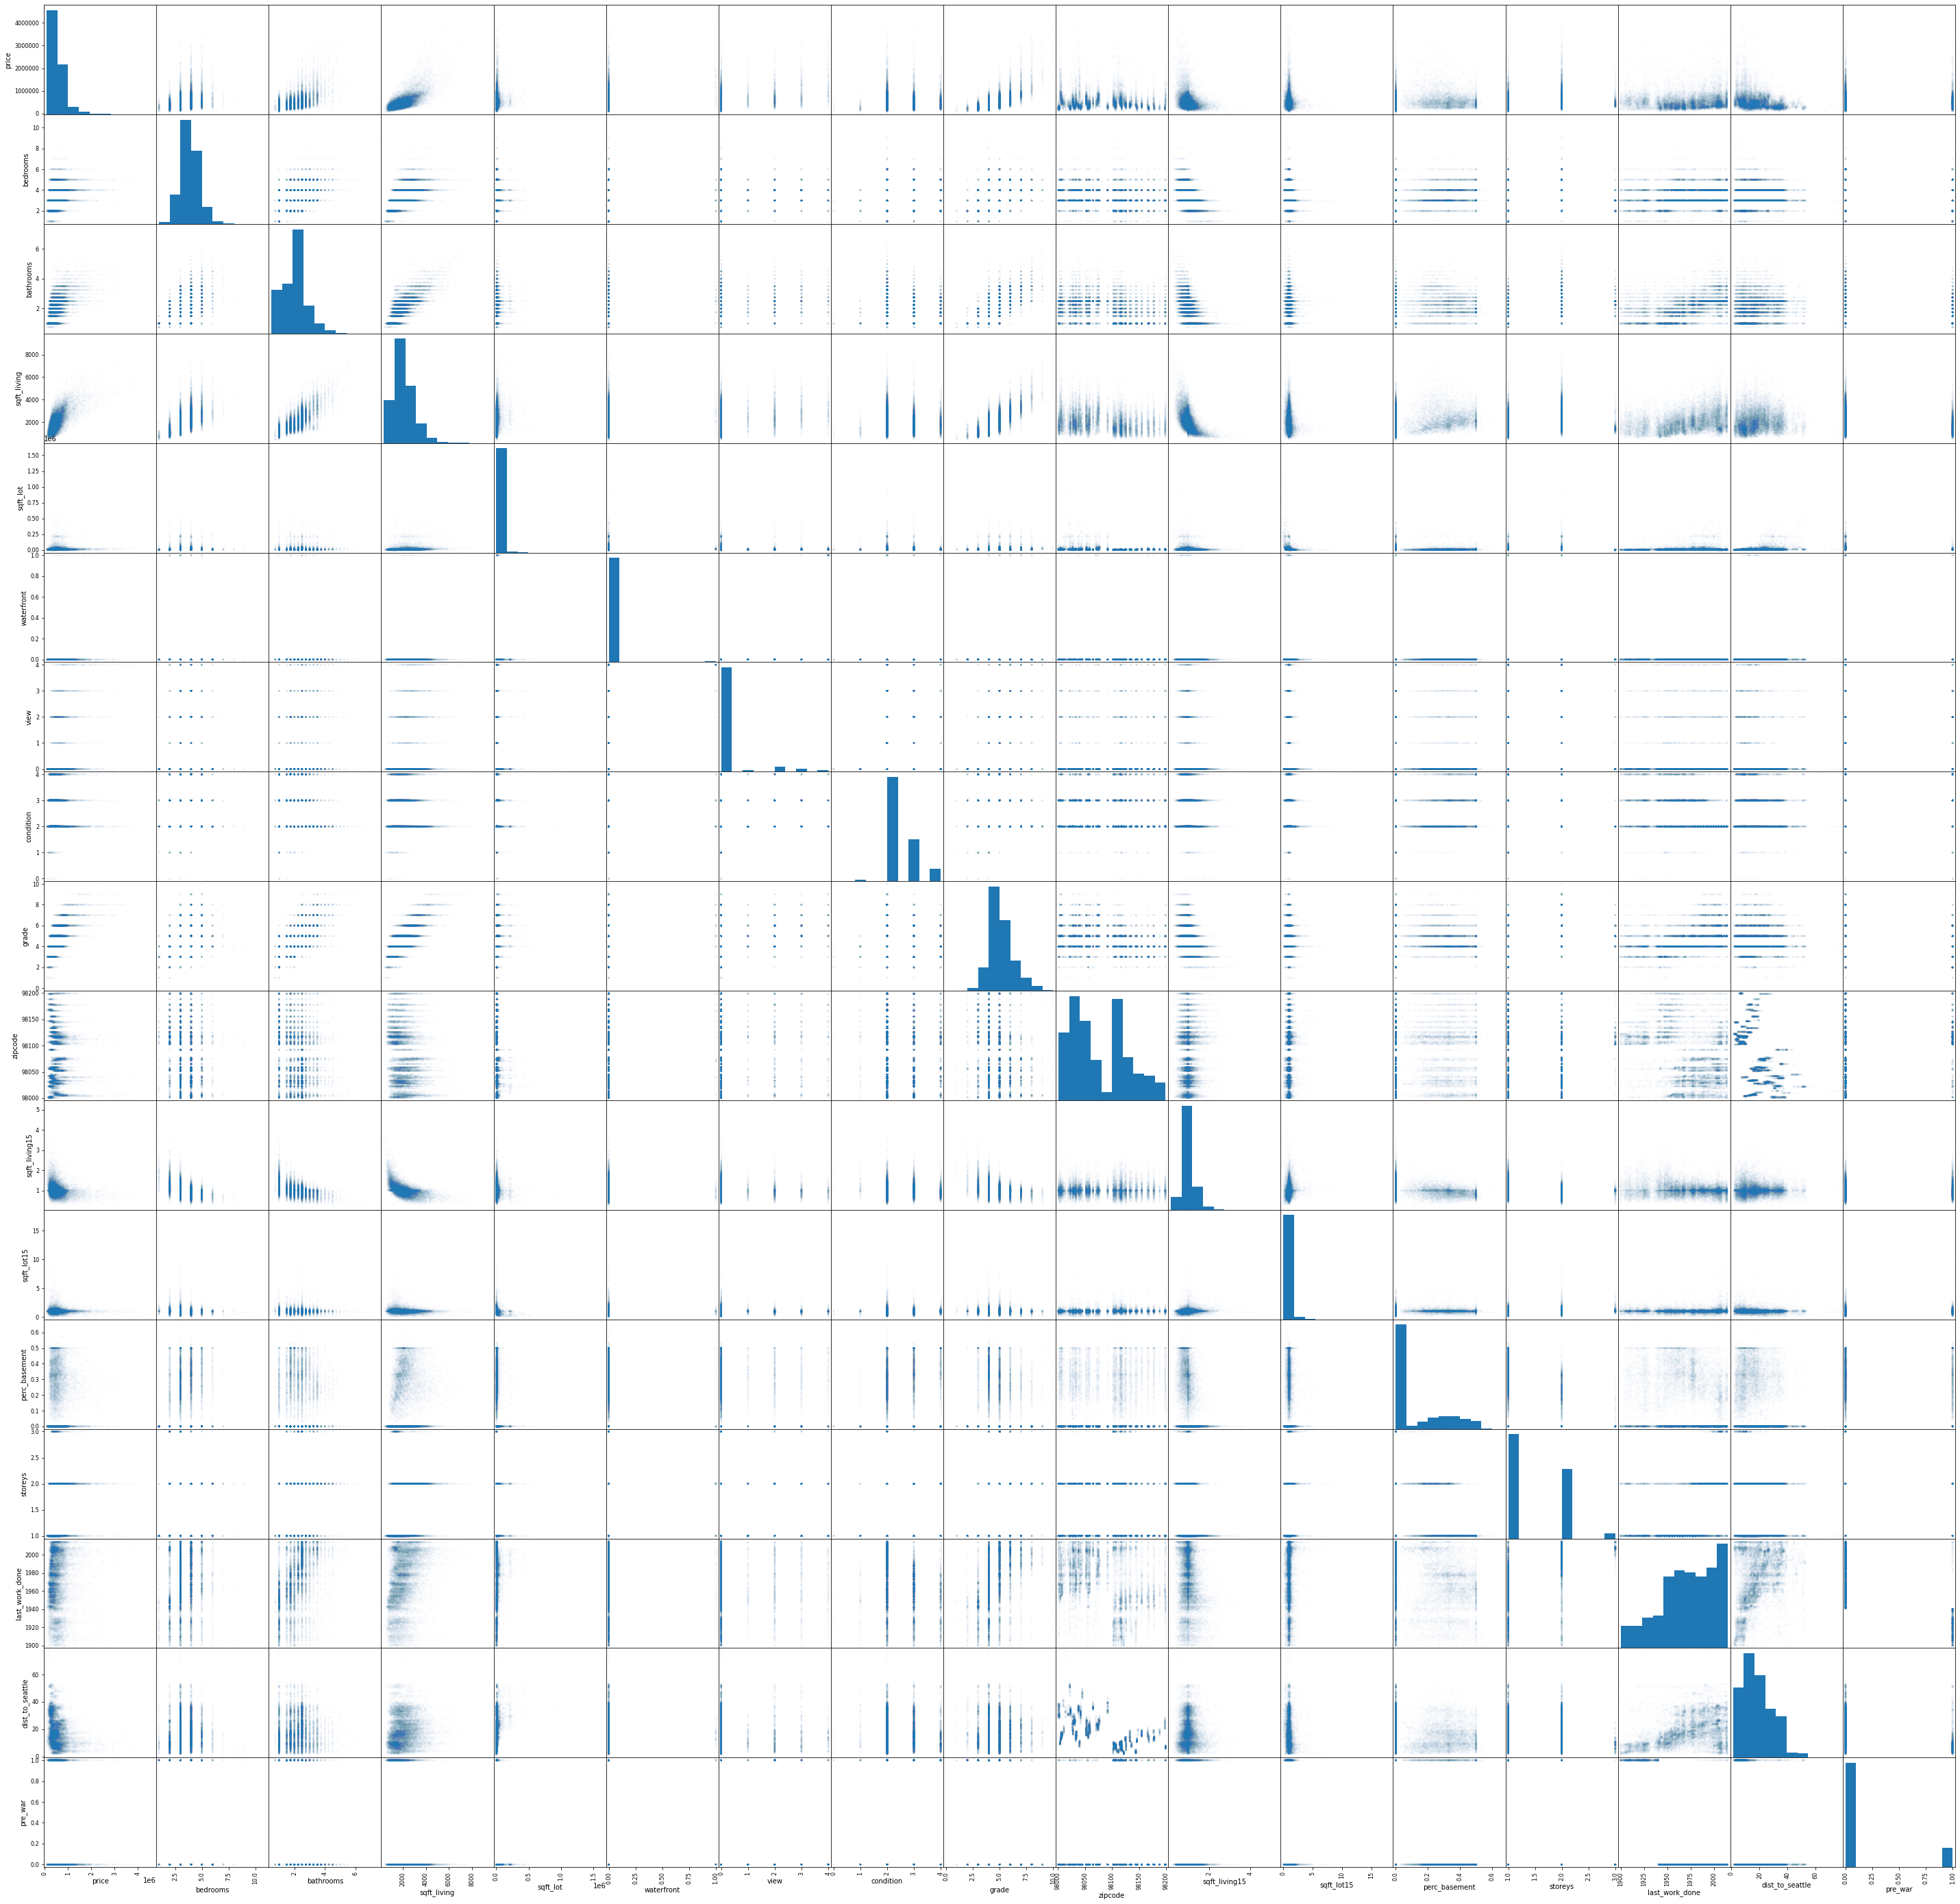

In [31]:
pd.plotting.scatter_matrix(df,figsize = (50,50),alpha = .01);

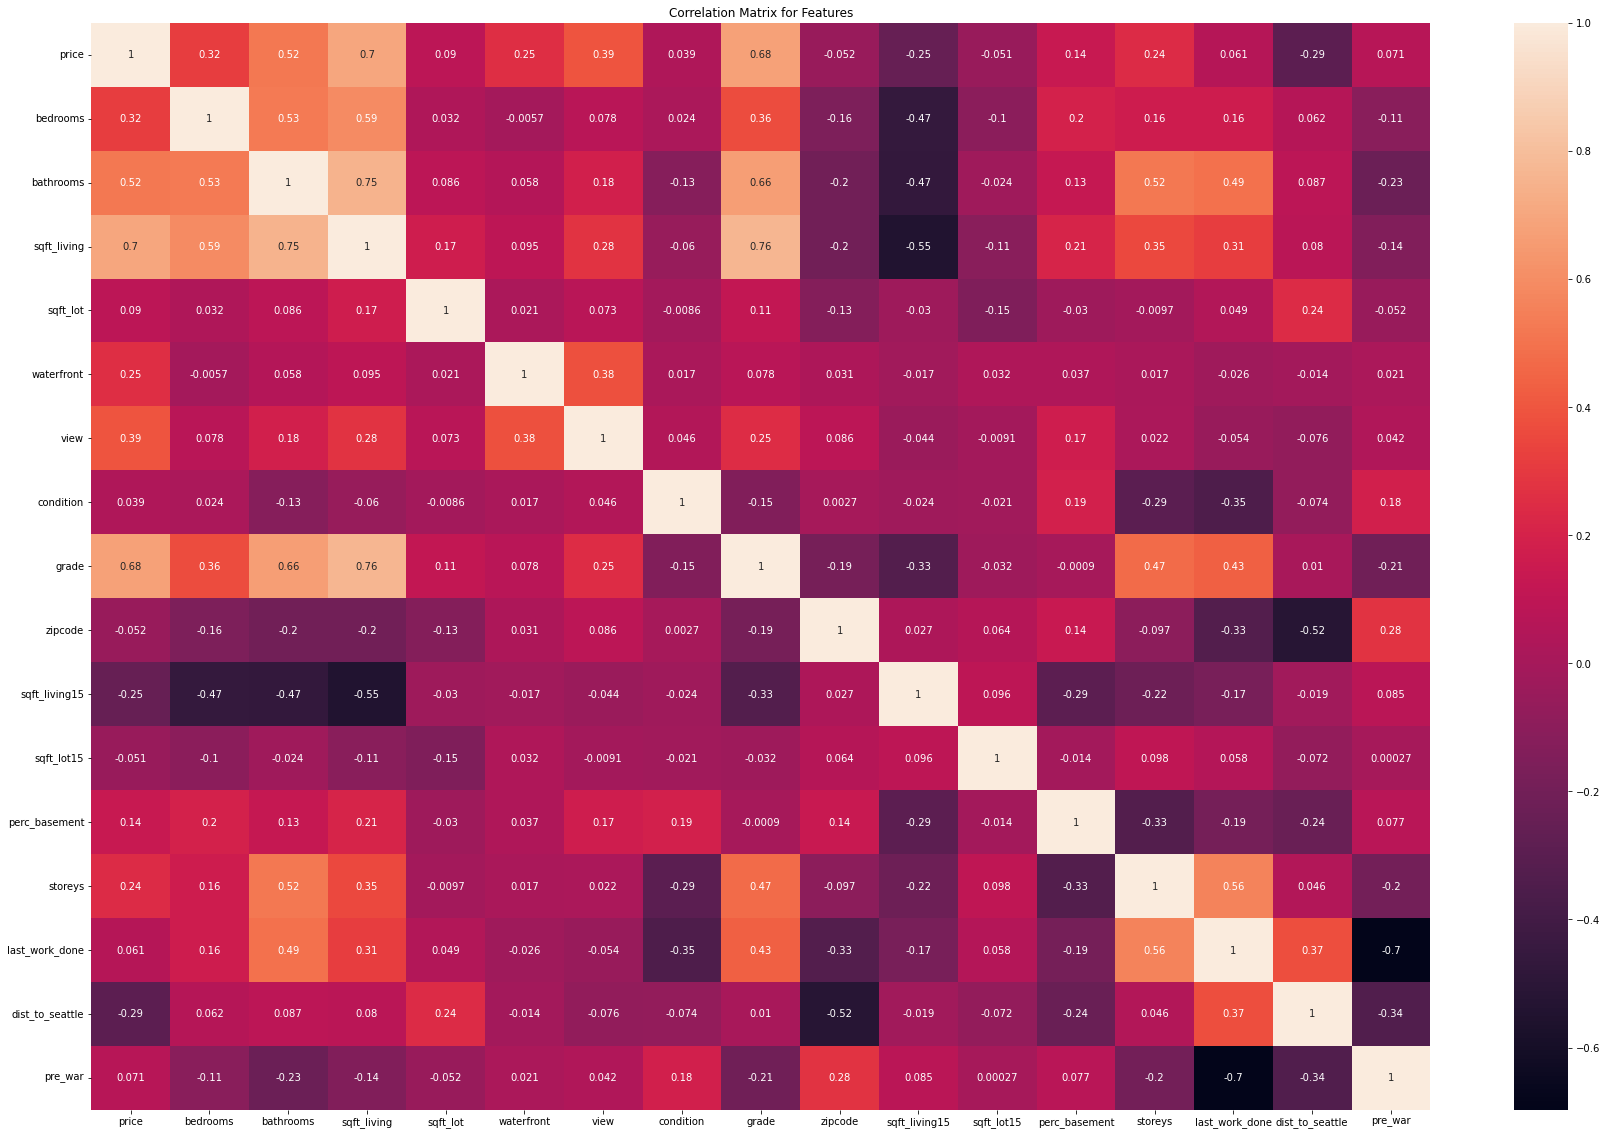

In [32]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.show()

bedrooms
bathrooms
sqft_living
sqft_lot
waterfront
view
condition
grade
zipcode
sqft_living15
sqft_lot15
perc_basement
storeys
last_work_done
dist_to_seattle
pre_war


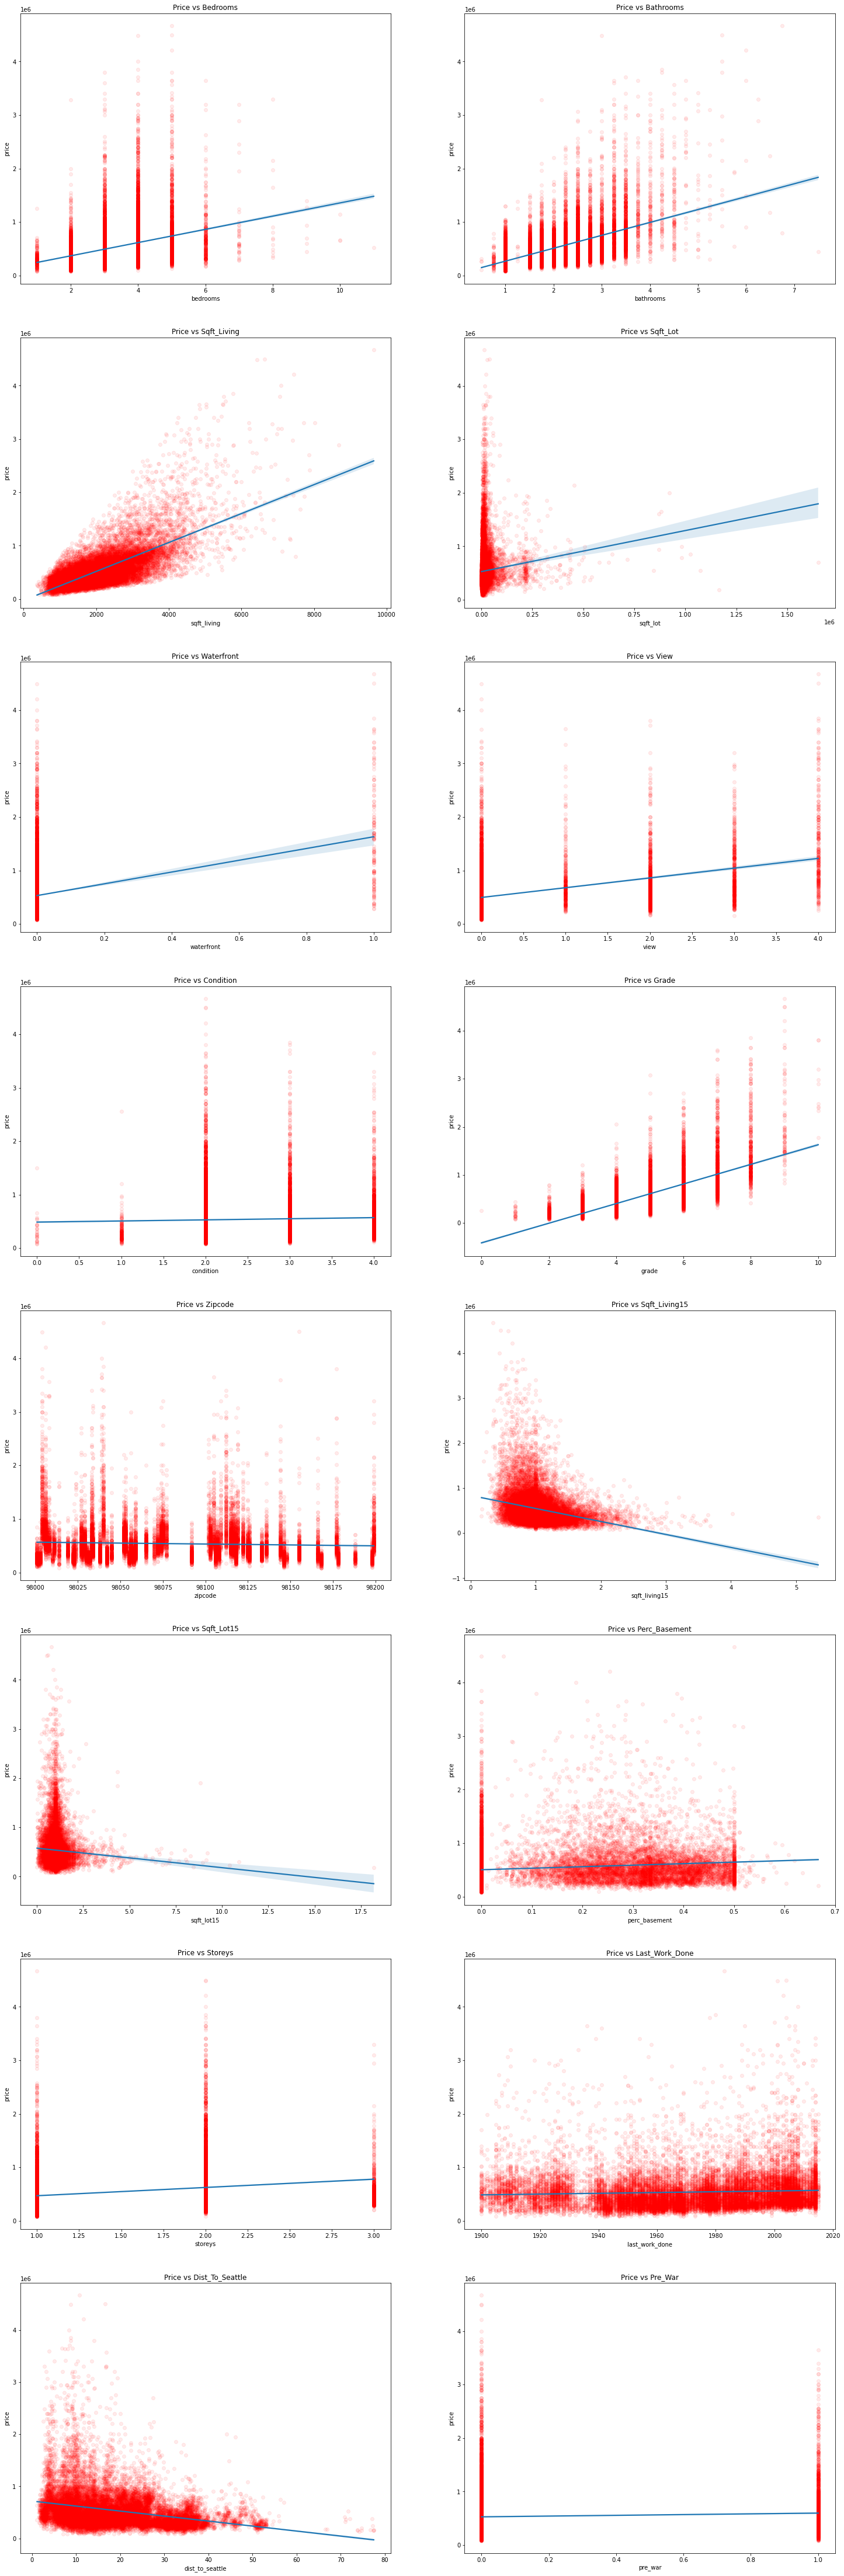

In [33]:
exclude_list = ['price']
frame = df.loc[:, ~df.columns.isin(exclude_list)]
cols = 2
rows = int(len(frame.columns) // cols) + int(len(frame.columns) % cols > 0)
f = plt.figure(figsize=(25,10*rows))
for i, col in enumerate(frame.columns):
    print(col)
    f.add_subplot(rows, cols, i+1)
    sns.regplot(data = frame , x= col, y = df['price'],scatter_kws={'color':'red','alpha':.08}).set(title='Price vs '+str(col).title())
plt.show();

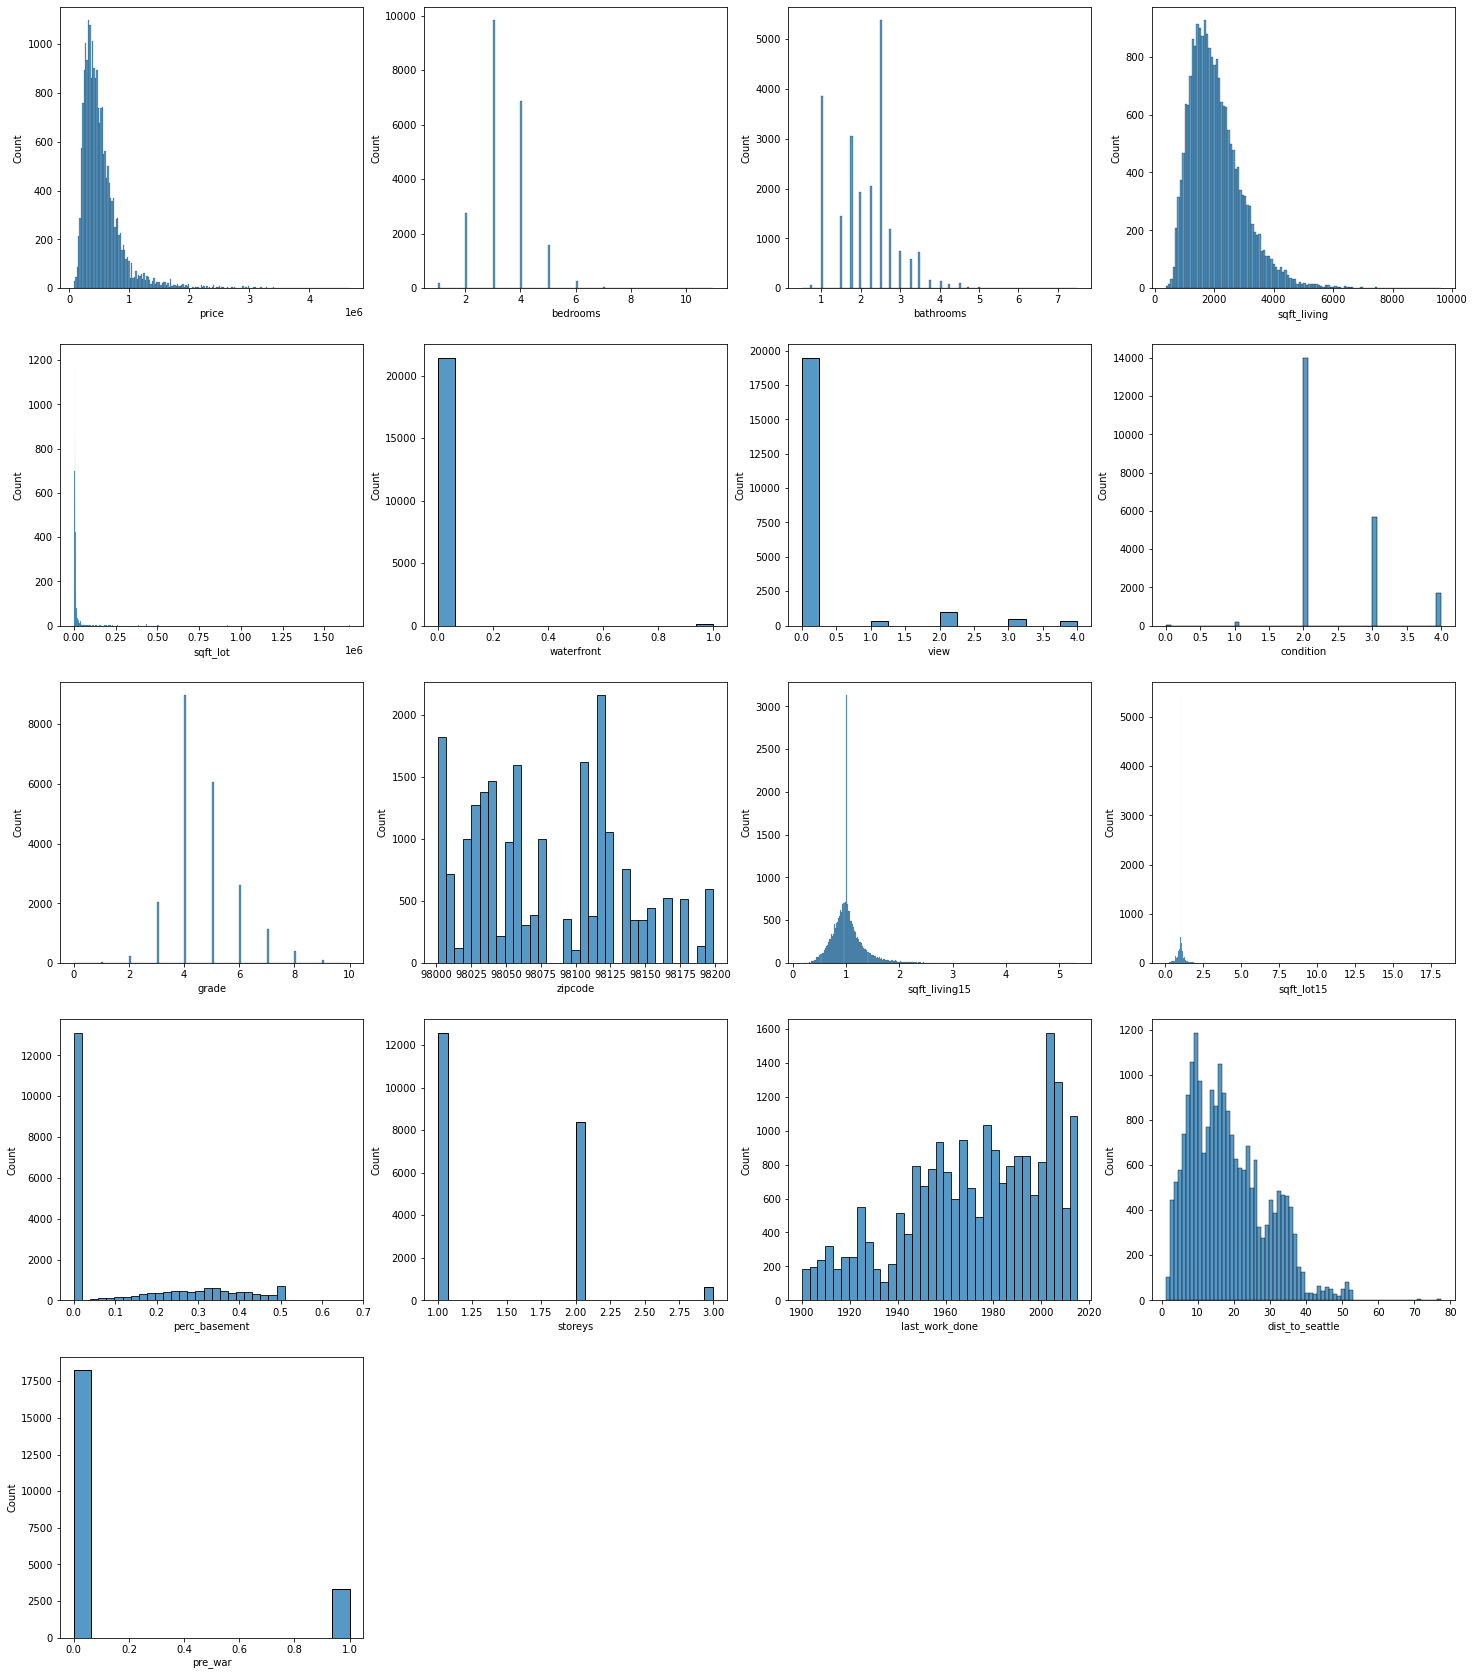

In [34]:
exclude_list = []
frame = df.loc[:, ~df.columns.isin(exclude_list)]
cols = 4
rows = int(len(frame.columns) / cols) + int(len(frame.columns) % cols > 0)
f = plt.figure(figsize=(25,6*rows))
for i, col in enumerate(frame.columns):
    f.add_subplot(rows, cols, i+1)
    sns.histplot(frame[col])
plt.show()

<AxesSubplot:xlabel='grade', ylabel='price'>

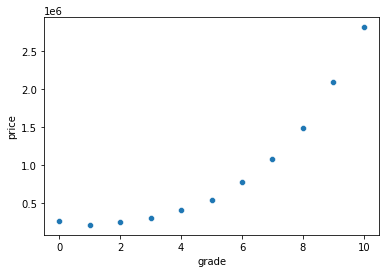

In [35]:
target = 'grade'


sub_frame = df[['price',target]].groupby(target).mean()
sns.scatterplot(data = sub_frame, x = target, y= 'price')

'grade' appears to be logarithmic, so we can scale it by the e exponent to get it closer to a linear relationship.

<AxesSubplot:xlabel='grade', ylabel='price'>

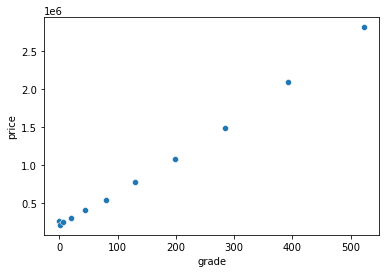

In [36]:
df['grade'] = df.grade**np.e
target = 'grade'


sub_frame = df[['price',target]].groupby(target).mean()
sns.scatterplot(data = sub_frame, x = target, y= 'price')

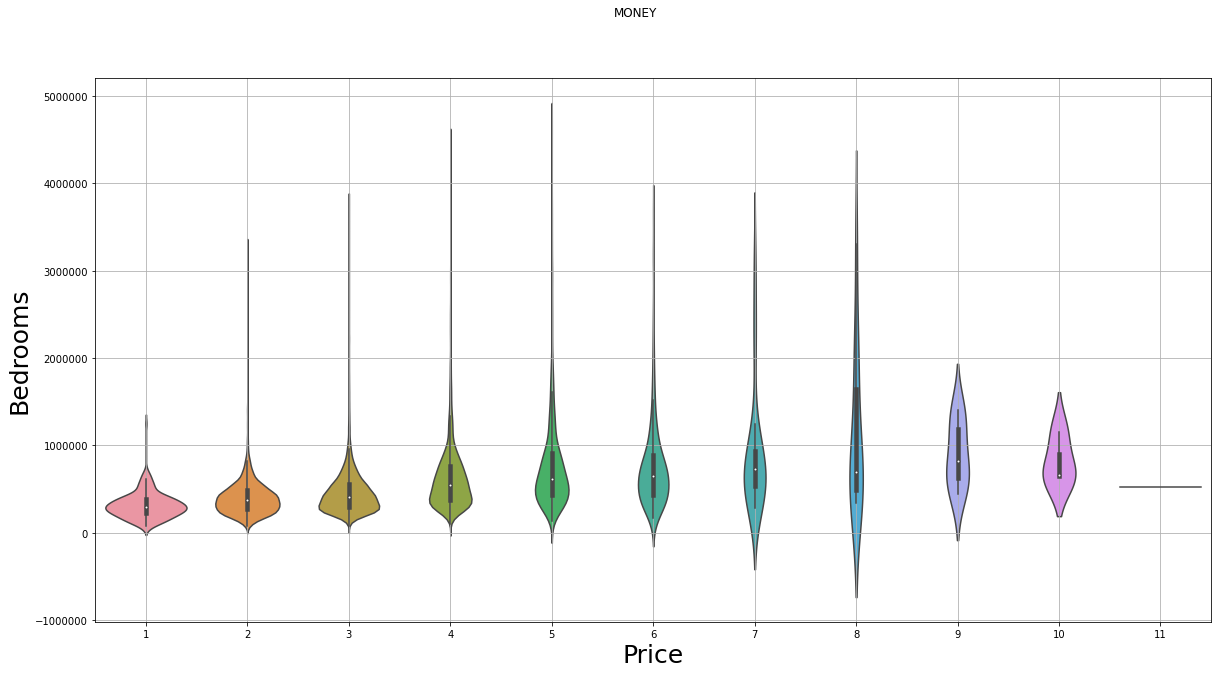

In [37]:
fig, axs = plt.subplots(figsize = (20,10))
fig.suptitle("MONEY")
sns.violinplot(data = df, x = 'bedrooms', y = 'price')
plt.ticklabel_format(style='plain', axis='y')
axs.set_xlabel("Price", fontsize = 25)
axs.set_ylabel("Bedrooms", fontsize = 25)
plt.grid()

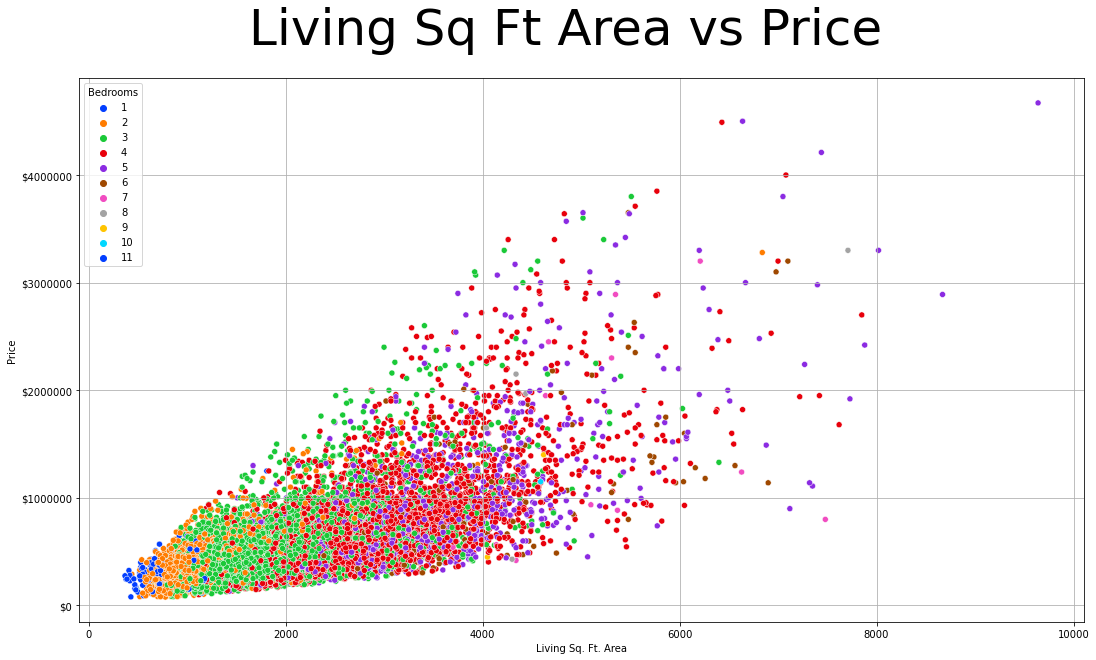

In [38]:
fig, axs = plt.subplots(figsize = (18,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', hue = 'bedrooms', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Bedrooms')

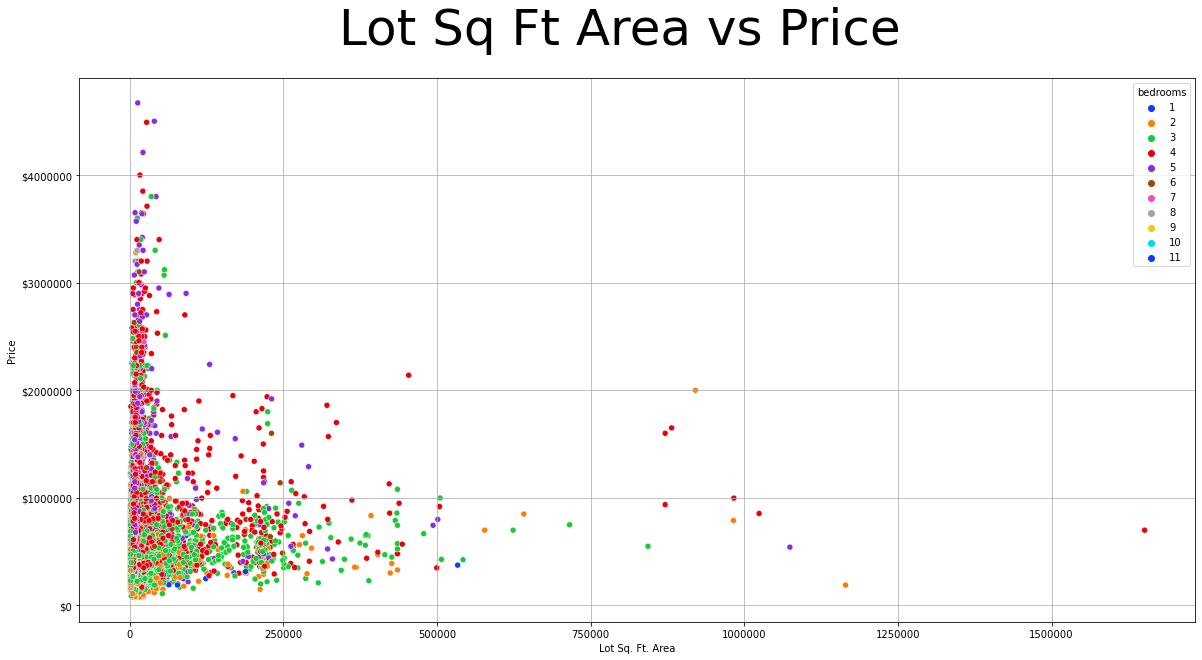

In [39]:
fig, axs = plt.subplots(figsize = (20,10))
fig.suptitle('Lot Sq Ft Area vs Price', fontsize  = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_lot', y = 'price', hue = 'bedrooms', palette = 'bright' ).set(xlabel='Lot Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

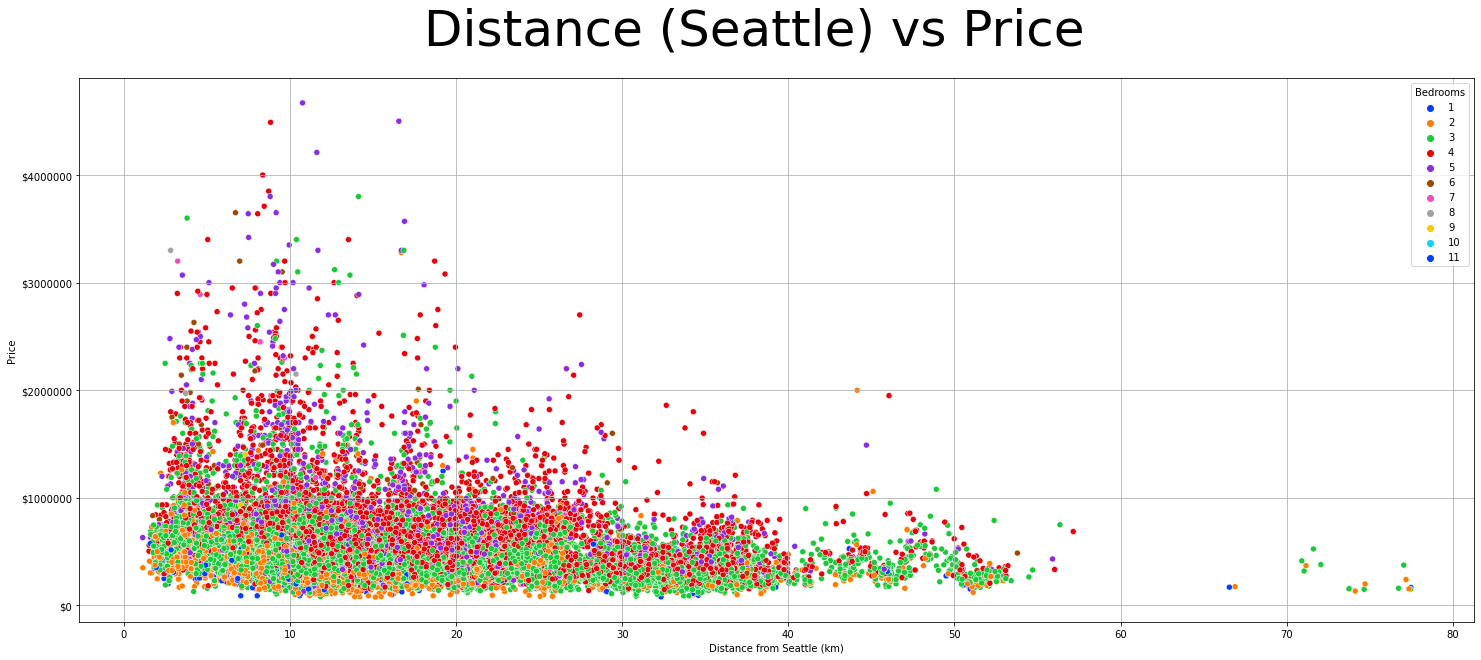

In [40]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Distance (Seattle) vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'dist_to_seattle', y = 'price', hue = 'bedrooms', palette = 'bright').set(xlabel='Distance from Seattle (km)', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Bedrooms')

In [41]:
df = pd.get_dummies(df,columns=['zipcode'],drop_first=True)

## Simple Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep

In [43]:
X = np.array(df.sqft_living).reshape(-1, 1)
y = df.price
sm = LinearRegression().fit(X,y)
sm.score(X, y)

0.48538475853031005

Our baseline simple linear regression model shows an r² of 48.5%

## Preliminary Multivariate Linear Regression

In [44]:
standard_df = pd.DataFrame(prep.StandardScaler().fit_transform(df),columns = df.columns)
standard_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  \
0     -0.897396 -0.410780  -1.457564    -0.991196 -0.227950   -0.081657   
1     -0.001135 -0.410780   0.177528     0.543960 -0.189468   -0.081657   
2     -1.016198 -1.518074  -1.457564    -1.444012 -0.122801   -0.081657   
3      0.185999  0.696515   1.158583    -0.129742 -0.243661   -0.081657   
4     -0.080526 -0.410780  -0.149490    -0.438982 -0.169212   -0.081657   
...         ...       ...        ...          ...       ...         ...   
21584 -0.505831 -0.410780   0.504547    -0.604646 -0.337183   -0.081657   
21585 -0.392416  0.696515   0.504547     0.256808 -0.224010   -0.081657   
21586 -0.386459 -1.518074  -1.784582    -1.167905 -0.331890   -0.081657   
21587 -0.392416 -0.410780   0.504547    -0.527336 -0.306799   -0.081657   
21588 -0.605069 -1.518074  -1.784582    -1.167905 -0.338513   -0.081657   

          view  condition     grade  sqft_living15  ...  zipcode_98146  \
0     -0.30455  -0.630020 -0.565550       0.343988  ...      -0.116278   
1     -0.30455  -0.630020 -0.565550      -1.207178  ...      -0.116278   
2     -0.30455  -0.630020 -0.978172       8.122034  ...      -0.116278   
3     -0.30455   2.444111 -0.565550      -1.089414  ...      -0.116278   
4     -0.30455  -0.630020  0.068867       0.135769  ...      -0.116278   
...        ...        ...       ...            ...  ...            ...   
21584 -0.30455  -0.630020  0.068867      -0.096023  ...      -0.116278   
21585 -0.30455  -0.630020  0.068867      -0.770325  ...       8.600105   
21586 -0.30455  -0.630020 -0.565550      -0.096023  ...      -0.116278   
21587 -0.30455  -0.630020  0.068867      -0.481376  ...      -0.116278   
21588 -0.30455  -0.630020 -0.565550      -0.096023  ...      -0.116278   

       zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  \
0          -0.051451      -0.145239      -0.109112      -0.112327   
1          -0.051451      -0.145239      -0.109112      -0.112327   
2          -0.051451      -0.145239      -0.109112      -0.112327   
3          -0.051451      -0.145239      -0.109112      -0.112327   
4          -0.051451      -0.145239      -0.109112      -0.112327   
...              ...            ...            ...            ...   
21584      -0.051451      -0.145239      -0.109112      -0.112327   
21585      -0.051451      -0.145239      -0.109112      -0.112327   
21586      -0.051451      -0.145239      -0.109112      -0.112327   
21587      -0.051451      -0.145239      -0.109112      -0.112327   
21588      -0.051451      -0.145239      -0.109112      -0.112327   

       zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  \
0          -0.109329       9.022237      -0.079621       -0.11463   
1          -0.109329      -0.110837      -0.079621       -0.11463   
2          -0.109329      -0.110837      -0.079621       -0.11463   
3          -0.109329      -0.110837      -0.079621       -0.11463   
4          -0.109329      -0.110837      -0.079621       -0.11463   
...              ...            ...            ...            ...   
21584      -0.109329      -0.110837      -0.079621       -0.11463   
21585      -0.109329      -0.110837      -0.079621       -0.11463   
21586      -0.109329      -0.110837      -0.079621       -0.11463   
21587      -0.109329      -0.110837      -0.079621       -0.11463   
21588      -0.109329      -0.110837      -0.079621       -0.11463   

       zipcode_98199  
0          -0.122075  
1          -0.122075  
2          -0.122075  
3          -0.122075  
4          -0.122075  
...              ...  
21584      -0.122075  
21585      -0.122075  
21586      -0.122075  
21587      -0.122075  
21588      -0.122075  

[21589 rows x 85 columns]

Here, we will do our test-train split to test our predictive power.

In [45]:
X = standard_df.iloc[:,1:]
y = standard_df.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:

lm = LinearRegression().fit(X_train,y_train)
lm.score(X_train, y_train)

0.839355607041983

In [47]:
lm.score(X_test, y_test)

0.8205623608865537

In [48]:
coef_list = list(lm.coef_)
coef_list.append(lm.intercept_)
res_df = pd.DataFrame(coef_list,columns=['coefficient'])

In [49]:
res_df

coefficient
0     -0.031148
1      0.052610
2      0.421252
3      0.025843
4      0.147826
..          ...
80    -0.020924
81    -0.011492
82    -0.014897
83     0.083846
84    -0.000082

[85 rows x 1 columns]

In [50]:
col_list = list(X.columns)
col_list.append('intercept')
res_df['variable'] = col_list
res_df.set_index('variable',inplace=True)
res_df['variable'] = col_list

In [51]:
res_df['abs_coeff'] = res_df.coefficient.abs()
coeff_df = res_df.sort_values('abs_coeff',ascending=False)

Text(0.5, 1.0, '10 Strongest Influencers of Price')

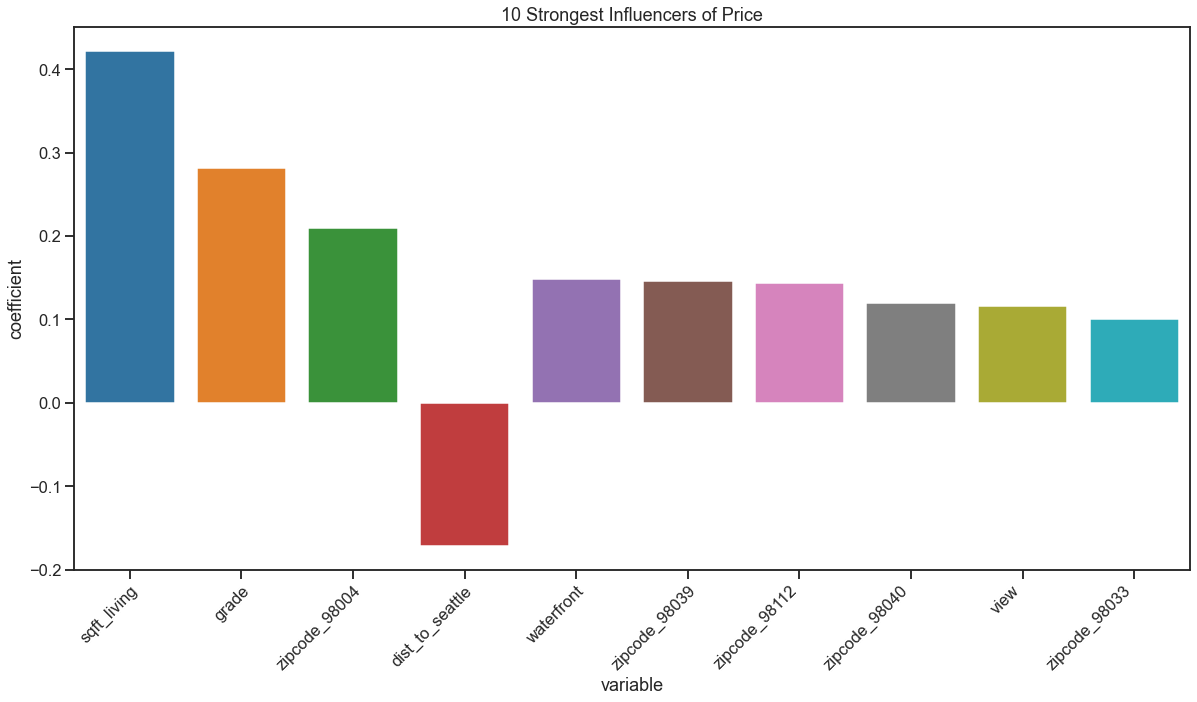

In [53]:

fig, axs = plt.subplots(figsize = (20,10))
plt.setp(axs.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')
axs = sns.barplot(data = coeff_df.head(10),x='variable',y='coefficient')


sns.set_context("talk")
sns.set_style("ticks")
axs.set_title('10 Strongest Influencers of Price')

Text(0.5, 1.0, 'Our Model Predictions')

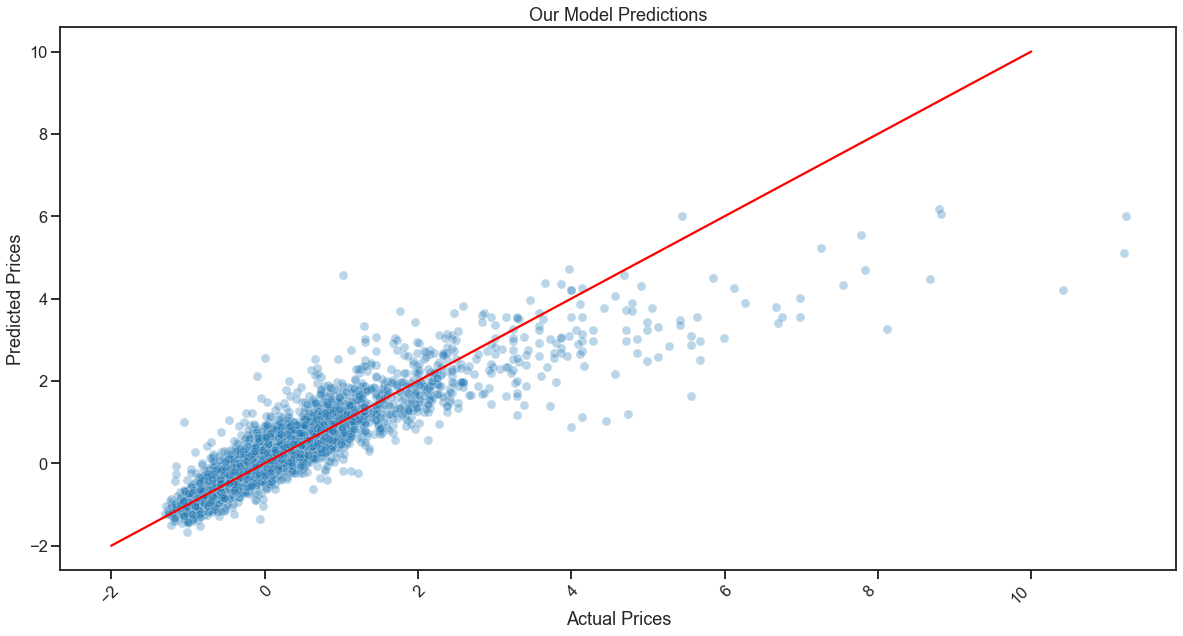

In [55]:
y_ax = lm.predict(X_test)
x_ax = y_test
fig, axs = plt.subplots(figsize = (20,10))
plt.setp(axs.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')


sns.set_context("talk")
sns.set_style("ticks")

X_plot = np.linspace(-2, 10, 100)
Y_plot = X_plot
axs = sns.scatterplot(x=x_ax, y=y_ax,alpha=.3)
plt.plot(X_plot, Y_plot, color='r')
#axs.plot(ax.get_ylim(), ax.get_ylim())
axs.set_xlabel('Actual Prices')
axs.set_ylabel('Predicted Prices')
axs.set_title('Our Model Predictions')

In [56]:
df.columns[0:17]

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'sqft_living15',
       'sqft_lot15', 'perc_basement', 'storeys', 'last_work_done',
       'dist_to_seattle', 'pre_war', 'zipcode_98002'],
      dtype='object')

Our predictions from this model have improved significantly over the baseline. We now have 83.9% and 82.1% for our train score and test score, respectively.

## Multivariate Model with Interactions

In order to work with interactions, we are going to make a dataframe that has every 2nd-order interaction possible. Obviously, zip-codes don't need to have interactions with each other, so we will do those separately to cut down on the combinations we have to calculate.

In [57]:
df_interact = df.copy()


2nd order interactions without zip-codes:

In [ ]:
start_i = 1
finish_i = 16
for i,x in enumerate(df_interact.columns[start_i:finish_i]):
    for j,y in enumerate(df_interact.columns[i+start_i:finish_i]):
        df_interact[x+' * '+y] = df_interact[x] * df_interact[y]

2nd order interactions between each zip code and other variables:

In [ ]:
start_i = 16
finish_i = 85
df_interact = df_interact.copy()
for i,x in enumerate(df_interact.columns[start_i:85]):
    for j,y in enumerate(df_interact.columns[1:start_i]):
        df_interact[x+' * '+y] = df_interact[x] * df_interact[y]

We will skip the part where we standardize so we can use the data more easily for predictions

In [63]:
df_int_stand = df_interact
#df_int_stand = pd.DataFrame(prep.StandardScaler().fit_transform(df_interact),columns = df_interact.columns)

In [64]:
X2 = df_int_stand.iloc[:,1:]
y2 = df_int_stand.price
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)
# lm2 = LinearRegression().fit(X2_train,y2_train)
# score_baseline = lm2.score(X2_test, y2_test)

In [65]:
results = []

In [67]:
inc = 1
score_baseline = 0
X4_train = pd.DataFrame(X2_train['bedrooms'],columns=['bedrooms'])
X4_test = pd.DataFrame(X2_test['bedrooms'],columns=['bedrooms'])

bedrooms
2257          3
4067          4
12826         3
20658         4
21212         3
...         ...
11971         4
21583         4
5395          4
860           1
15803         4

[15112 rows x 1 columns]

Here is the meat of the model. This code starts with one variable and runs a regression. It then adds another variable and tests whether the model has improved predicting power agains the test data. If it does not, it drops the variable and moves on to the next.

Then, it starts at the beginning again and tries removing each variable. It tests if the model is better with the variable removed, and if it is, it leaves it out and moves to the next.

These two procedures are repeated for as many times as the 'runs' variable.

In [ ]:
inc = 1
runs = 2
for run in range(0,runs):
    for x in X2_train.columns:
        print('run '+ str(inc) + ' testing column ' + x + '  columns : ' +str(len(X4_train.columns)))
        print('     initial score:' + str(score_baseline))
        X4_train[x] = X2_train[x]
        X4_test[x] = X2_test[x]
        lm_test = LinearRegression().fit(X4_train,y2_train)
        score = lm_test.score(X4_test, y2_test)
        print('     train score:' + str(lm_test.score(X4_train, y2_train)))
        print('     new score:' + str(score))
        if score < score_baseline:
            X4_train.drop(columns = [x],inplace=True)
            X4_test.drop(columns = [x],inplace=True)
        else:
            results.append([[X_train.columns],[score]])
            score_baseline = score
        inc += 1
    for x in X4_train.columns[::-1]:
        print('run '+ str(inc) + ' testing column ' + x + '  columns : ' +str(len(X4_train.columns)))
        print('     initial score:' + str(score_baseline))

        X3_train = X4_train.drop(columns = [x],inplace=False)
        X3_test = X4_test.drop(columns = [x],inplace=False)
        lm_test = LinearRegression().fit(X3_train,y2_train)
        score = lm_test.score(X3_test, y2_test)
        print('     train score:' + str(lm_test.score(X3_train, y2_train)))
        print('     new score:' + str(score))
        if score >= score_baseline:
            X4_train.drop(columns = [x],inplace=True)
            X4_test.drop(columns = [x],inplace=True)
            results.append([[X4_train.columns],[score]])
            score_baseline = score
        inc += 1


In [195]:
lm4 = LinearRegression().fit(X4_train,y2_train)
lm4.score(X4_test, y2_test)

0.9075039575455685

With over 500 variables (some runs have over 600!) we are getting a r² of over 90.5%.

This is a considerable improvement.

Text(0.5, 1.0, 'Our Model Predictions')

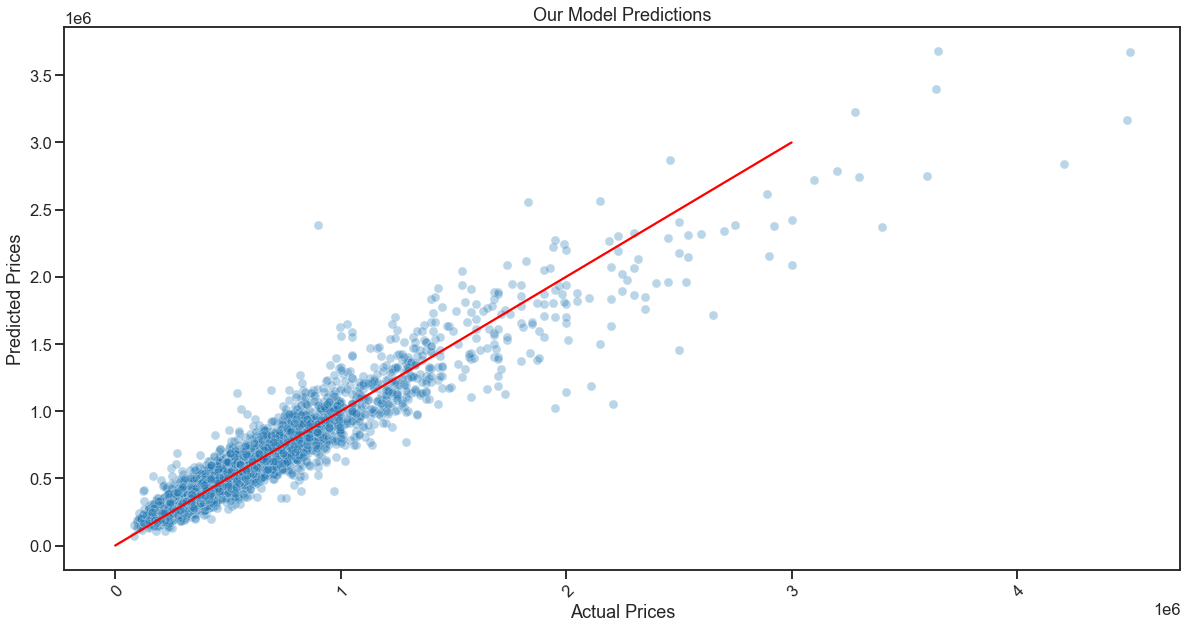

In [80]:
std = df.price.std()
mn = df.price.mean()
y_ax = lm4.predict(X4_test)
x_ax = y_test*std+mn
fig, axs = plt.subplots(figsize = (20,10))
plt.setp(axs.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')


sns.set_context("talk")
sns.set_style("ticks")

X_plot = np.linspace(-2, 3000000, 1000)
Y_plot = X_plot
axs = sns.scatterplot(x=x_ax, y=y_ax,alpha=.3)
plt.plot(X_plot, Y_plot, color='r')
#axs.plot(ax.get_ylim(), ax.get_ylim())
axs.set_xlabel('Actual Prices')
axs.set_ylabel('Predicted Prices')
axs.set_title('Our Model Predictions')

In [81]:

predict_df = pd.DataFrame(list(y_ax),columns=['predicted_price'])
predict_df['actual_price'] = pd.Series(list(x_ax))
predict_df = predict_df.loc[predict_df['actual_price']<1900000]
predict_df

predicted_price   actual_price
0        3.206828e+05  308994.686917
1        3.715268e+05  358995.844954
2        7.173207e+05  775005.479825
3        6.362913e+05  650002.584731
4        4.956842e+05  424997.373563
...               ...            ...
6472     4.934304e+05  424947.372405
6473     1.270473e+06  970009.996170
6474     6.325392e+05  699803.738137
6475     6.943566e+05  799006.035683
6476     4.023557e+05  459498.172609

[6402 rows x 2 columns]


With homes over $1.9 million, the model does not generalize very well, so we don't want to use the model for those types of homes.
With those removed, the errors do not seem to systematically depart from 0.

Text(0.5, 1.0, 'Our Model Predictions')

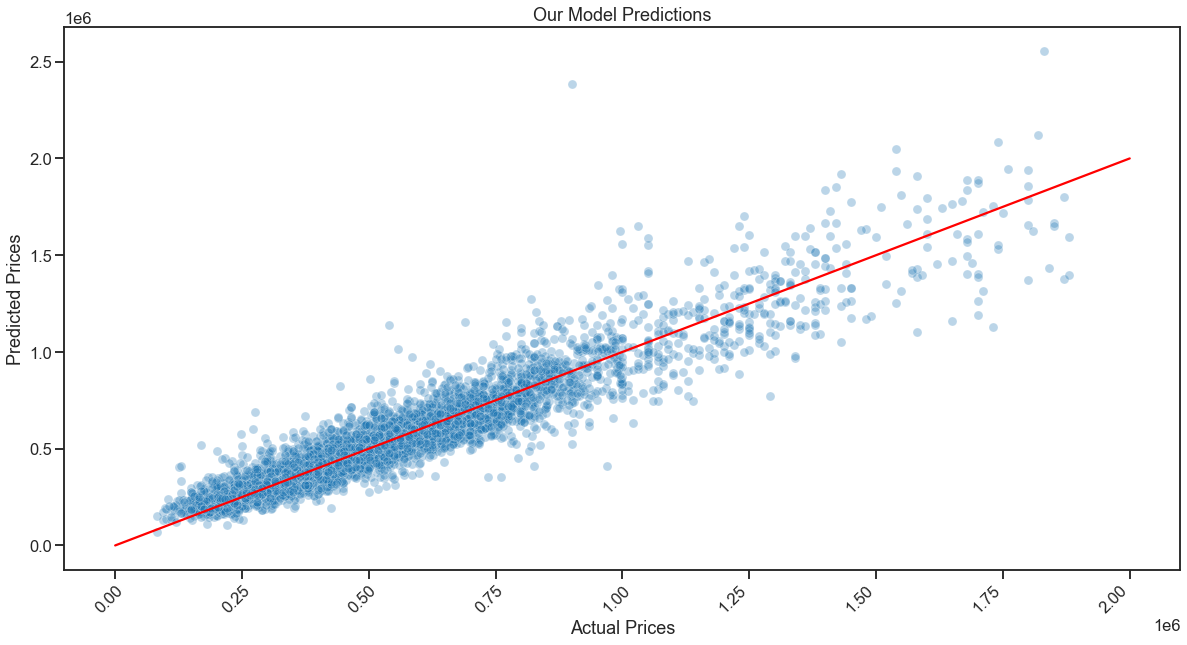

In [83]:

fig, axs = plt.subplots(figsize = (20,10))
plt.setp(axs.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')


sns.set_context("talk")
sns.set_style("ticks")

X_plot = np.linspace(-2, 2000000, 100)
Y_plot = X_plot
axs = sns.scatterplot(x=predict_df['actual_price'], y=predict_df['predicted_price'],alpha=.3)
plt.plot(X_plot, Y_plot, color='r')
#axs.plot(ax.get_ylim(), ax.get_ylim())
axs.set_xlabel('Actual Prices')
axs.set_ylabel('Predicted Prices')
axs.set_title('Our Model Predictions')

## Prediction

Here we will do a prediction from a listing from zillow.

![zillow_listing](zillow_list_shot.png)

In [187]:
sample_house = { 'bedrooms': 2, 'bathrooms': 1,'sqft_living': 1400,'sqft_lot':1400,'condition':3,'grade':5,'sqft_living15': 1,'sqft_lot15':1,'storeys':2, 'last_work_done': 1900, 'dist_to_seattle':.622, 'pre_war':1}
sample_df = pd.DataFrame(sample_house,index=[0])

In [188]:
sample_df['grade'] = sample_df['grade']**np.e

In [189]:
sample_df['zipcode_98104'] = [1]

In [190]:
sample_df = sample_df.copy()

In [191]:
sample_int_df = sample_df.copy()
for i,x in enumerate(sample_df.columns[:]):
    for j,y in enumerate(sample_df.columns[i:]):
        sample_int_df[x+' * '+y] = sample_df[x] * sample_df[y]

In [192]:
sample_predict_df = pd.DataFrame(columns=X4_test.columns)

In [193]:
for i,x in enumerate(sample_predict_df):
    if x in sample_int_df.columns:
        sample_predict_df[x] = sample_int_df[x]
    else:
        sample_predict_df[x] = 0

In [194]:
lm4.predict(sample_predict_df)[0]

655458.2328193188

We predicted $655,458 which is awfully close to $625,00.
Of course, the data we used to make this prediction was from 2015, so it's hard to say how well it generalizes to today, but with similar, more up-to-date data, we could make a modern model.